## Step 1: Download images of birds and non-birds

In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import * 
import time, json
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('bird photos', max_images=1)

In [ ]:
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

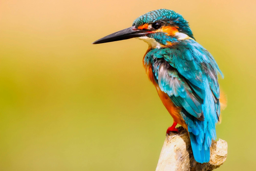

In [ ]:
from fastdownload import download_url
dest = 'resources/L1/bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

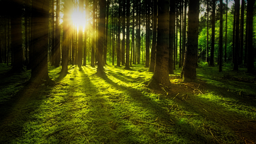

In [ ]:
forest_dest = 'resources/L1/forest.jpg'
download_url(search_images('forest photos', max_images=1)[0], forest_dest, show_progress=False)
Image.open(forest_dest).to_thumb(256, 256)

In [ ]:
searches = 'forest', 'bird'
path = Path('resources/L1/bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

## Step 2: Train our model

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

9

In [ ]:
failed

(#9) [Path('resources/L1/bird_or_not/forest/abd784a1-3a25-44ef-bdc1-80b6534cf595.jpg'),Path('resources/L1/bird_or_not/forest/fe60f645-6e9b-430b-adb3-e2b0fcf88a69.jpg'),Path('resources/L1/bird_or_not/forest/181caa2c-e35c-4944-afef-93f8041cba69.jpg'),Path('resources/L1/bird_or_not/forest/e3f5bf43-1e42-441c-9b41-9071b5498155.jpg'),Path('resources/L1/bird_or_not/bird/635ac5ea-6cb9-4789-8701-27df1f14b07c.png'),Path('resources/L1/bird_or_not/bird/33f184ad-e975-4923-b596-788f92dd50e2.jpg'),Path('resources/L1/bird_or_not/bird/0ec2bdec-71a3-44c4-baae-0140fd524502.jpg'),Path('resources/L1/bird_or_not/bird/618e54b8-5c9d-46af-9fa6-33d7c6c8bf4e.jpg'),Path('resources/L1/bird_or_not/bird/0ae76c90-5071-45e2-8714-a11079008bac.jpg')]

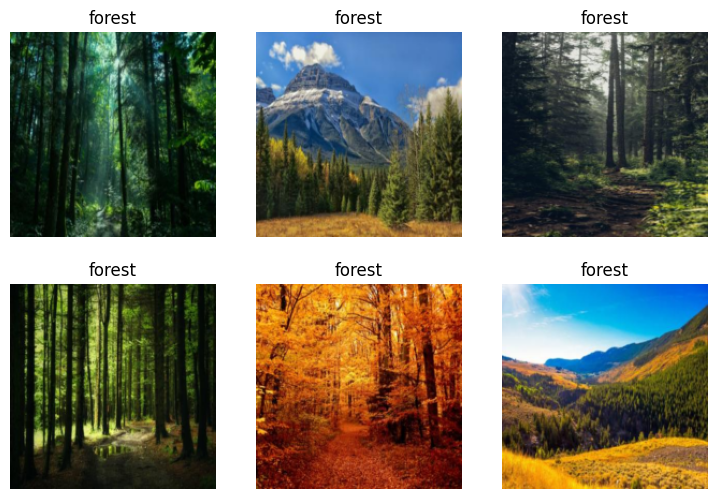

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, 
    item_tfms=[Resize(192, method='squish')]).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.165263,0.029461,0.003247,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.019386,0.000162,0.000000,00:07
1,0.021068,0.000943,0.000000,00:06
2,0.016560,0.000037,0.000000,00:07


## Step 3: Use our model

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('resources/L1/bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
